Epoch 1/50
391/391 [==============================] - 236s 593ms/step - loss: 1.7353 - accuracy: 0.1014 - val_loss: 1.3223 - val_accuracy: 0.0912
Epoch 2/50
391/391 [==============================] - 215s 550ms/step - loss: 1.3831 - accuracy: 0.0978 - val_loss: 1.1304 - val_accuracy: 0.1168
Epoch 3/50
391/391 [==============================] - 203s 520ms/step - loss: 1.2409 - accuracy: 0.0968 - val_loss: 1.0755 - val_accuracy: 0.0939
Epoch 4/50
391/391 [==============================] - 207s 530ms/step - loss: 1.1443 - accuracy: 0.0991 - val_loss: 1.0188 - val_accuracy: 0.0907
Epoch 5/50
391/391 [==============================] - 206s 526ms/step - loss: 1.0772 - accuracy: 0.0989 - val_loss: 0.8772 - val_accuracy: 0.1034
Epoch 6/50
391/391 [==============================] - 221s 565ms/step - loss: 1.0230 - accuracy: 0.0997 - val_loss: 0.8585 - val_accuracy: 0.0970
Epoch 7/50
391/391 [==============================] - 275s 704ms/step - loss: 0.9874 - accuracy: 0.1005 - val_loss: 0.7934 -

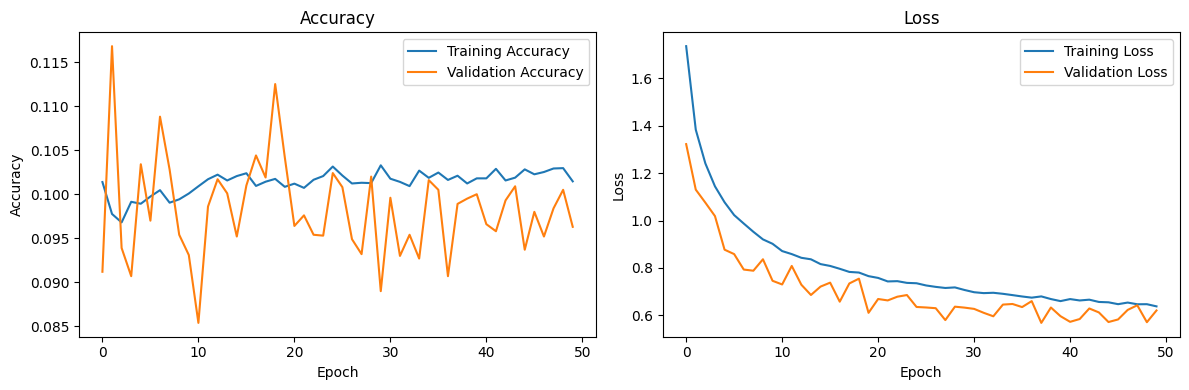

In [1]:
# Expt 12

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0



# Define the ConvNet architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))




# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])



# Set up data augmentation
datagen = ImageDataGenerator(rotation_range=15,
 width_shift_range=0.1,
 height_shift_range=0.1,
 horizontal_flip=True)



# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
 epochs=50,
 validation_data=(x_test, y_test))



# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')



# Plot the accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
